In [68]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option('float_format', '{:f}'.format)

import matplotlib.pyplot as plt
import matplotlib.colors as colors  
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns

from sklearn import metrics 
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import  RobustScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import linear_model

from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

import time

import collections
from collections import Counter

from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [69]:
df = pd.read_csv('/Đồ án/data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


In [70]:
df = df.drop("Time", axis = 1)

In [71]:

total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).T

,V1,V2,Amount,V28,V27,V26,V25,V24,V23,V22,V21,V20,V19,V18,V17,V16,V15,V14,V13,V12,V11,V10,V9,V8,V7,V6,V5,V4,V3,Class
Total,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Percent,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [72]:

y= df["Class"]
X = df.drop("Class", axis = 1)
X.shape,y.shape

((284807, 29), (284807,))

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 29), (56962, 29), (227845,), (56962,))

In [14]:
print("Fraudulent Count for Full data : ",np.sum(y))
print("Fraudulent Count for Train data : ",np.sum(y_train))
print("Fraudulent Count for Test data : ",np.sum(y_test))

Fraudulent Count for Full data :  492
Fraudulent Count for Train data :  394
Fraudulent Count for Test data :  98


In [74]:
X_test_saved = X_test.copy()
y_test_saved = y_test.copy()
print("Saved X_test & y_test")

Saved X_test & y_test


In [75]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = RobustScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

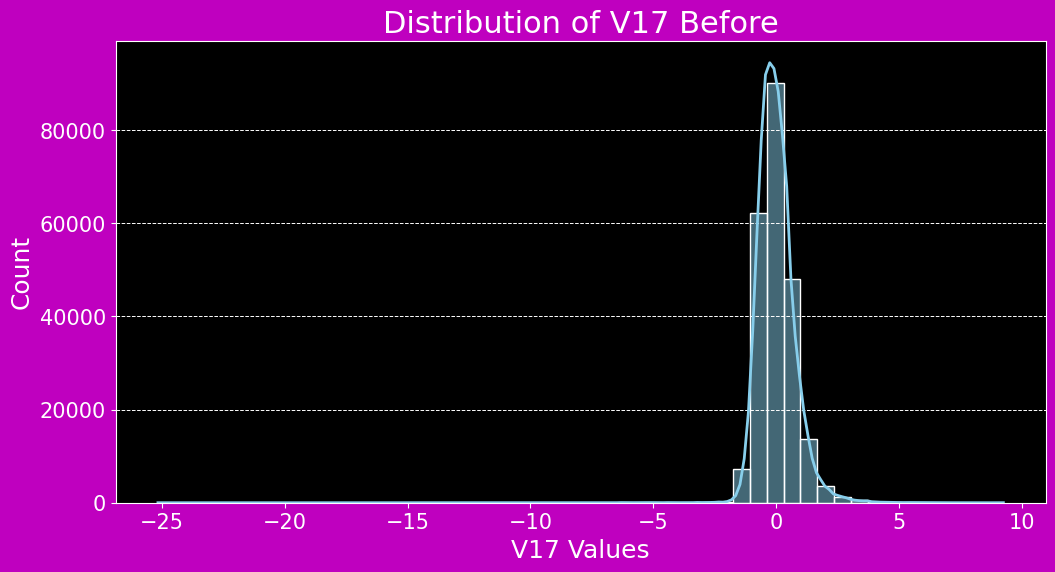

In [17]:


# Select the feature column you want to visualize (e.g., 'V1')
feature_column = X_train.columns[16]  # You can change the index to select a different column

# Set the plot style to a dark background for better contrast
with plt.style.context('dark_background'):
    # Create the figure with a specific size and background color
    plt.figure(figsize=(12, 6), facecolor='m')  # Larger figure size
    
    # Plot the histogram of the selected feature column with customized bins and a KDE line
    sns.histplot(X_train[feature_column], kde=True, bins=50, color='skyblue', line_kws={'color': 'red', 'lw': 2})
    
    # Set the title of the plot to the feature column name
    plt.title(f'Distribution of {feature_column} Before', fontsize=22)
    
    # Set the y-axis label to "Count" (number of occurrences)
    plt.ylabel("Count", fontsize=18)
    
    # Set the x-axis label (left empty as it's the feature name)
    plt.xlabel(f'{feature_column} Values', fontsize=18)
    
    # Adjust the size of the ticks on both axes for better readability
    plt.tick_params(axis='both', labelsize=15)
    
    # Add grid lines for easier reading of the graph
    plt.grid(True, axis='y', linestyle='--', linewidth=0.7)
    
    # Display the plot
    plt.show()


In [20]:
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())
tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp

,Skewness
Features,
V1,-3.306334
V2,-4.779484
V3,-2.247962
V4,0.687574
V5,-2.786851
V6,1.937381
V7,3.152665
V8,-8.639485
V9,0.541869


In [21]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt= preprocessing.PowerTransformer(method='yeo-johnson', copy=True)  # creates an instance of the PowerTransformer class.
pt.fit(X_train)

X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

y_train_pt = y_train
y_test_pt = y_test

In [22]:
y_test = np.array(y_test)
indices = np.where(y_test == 1)[0]
if len(indices) > 0:
    print(indices[0])
else:
    print("no")

840


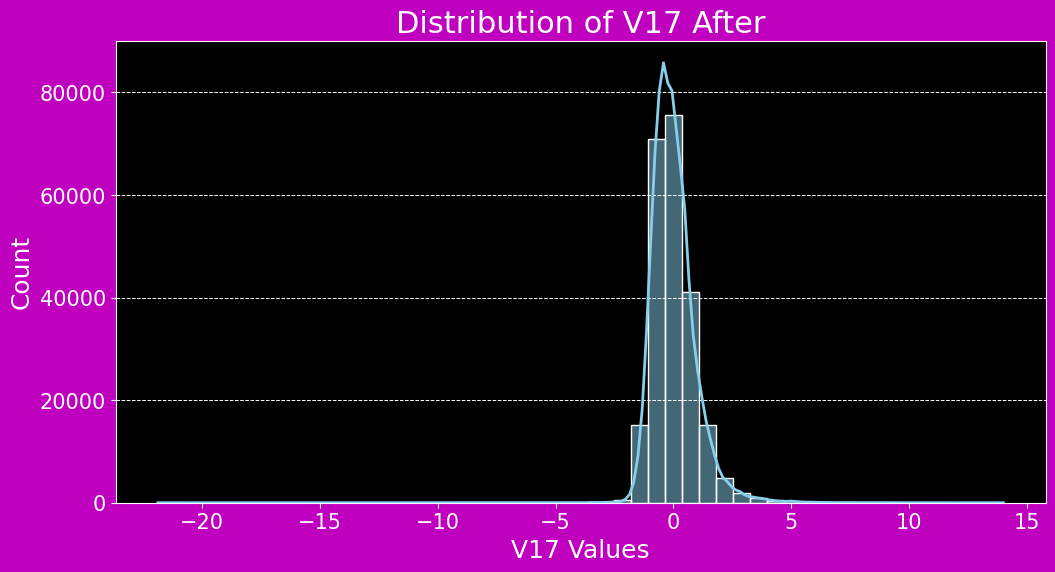

In [24]:
feature_column_index = 16  
feature_data = X_train_pt[:, feature_column_index]
feature_column_name = f"V{feature_column_index + 1}" 
with plt.style.context('dark_background'):
    plt.figure(figsize=(12, 6), facecolor='m')  
    sns.histplot(feature_data, kde=True, bins=50, color='skyblue', line_kws={'color': 'red', 'lw': 2})
    plt.title(f'Distribution of {feature_column_name} After', fontsize=22)
    plt.ylabel("Count", fontsize=18)
    plt.xlabel(f'{feature_column_name} Values', fontsize=18)
    plt.tick_params(axis='both', labelsize=15)
    plt.grid(True, axis='y', linestyle='--', linewidth=0.7)
    plt.show()


In [25]:
y_train.value_counts()/y_train.shape

Class
0   0.998271
1   0.001729
Name: count, dtype: float64

In [26]:
# perfom cross validation on the X_train & y_train 
# Initialize StratifiedKFold cross-validator
# perform cross validation
skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
#  Shuffle is False because we need a constant best model when we use GridSearchCV

============================================XGBoost Classifier:=============================================
Learning Rate = 0.001
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 1.097820520401001 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Time elapsed: 1.0029716491699219 seconds
Train: [     0      1      2 ... 153006 153116 153683] val: [151894 151895 151896 ... 227842 227843 227844]
Time elapsed: 1.06178617477417 seconds
ROC-AUC Score for val data = 0.9293000893254546
Mean precision val score: 0.0
Mean recall val score: 0.0
Mean f1 val score: 0.0
------------------------------------------------------------------------------------------------------------
Learning Rate = 0.01
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 1.4537229537963867 seconds
Train: [     0      1      2 .

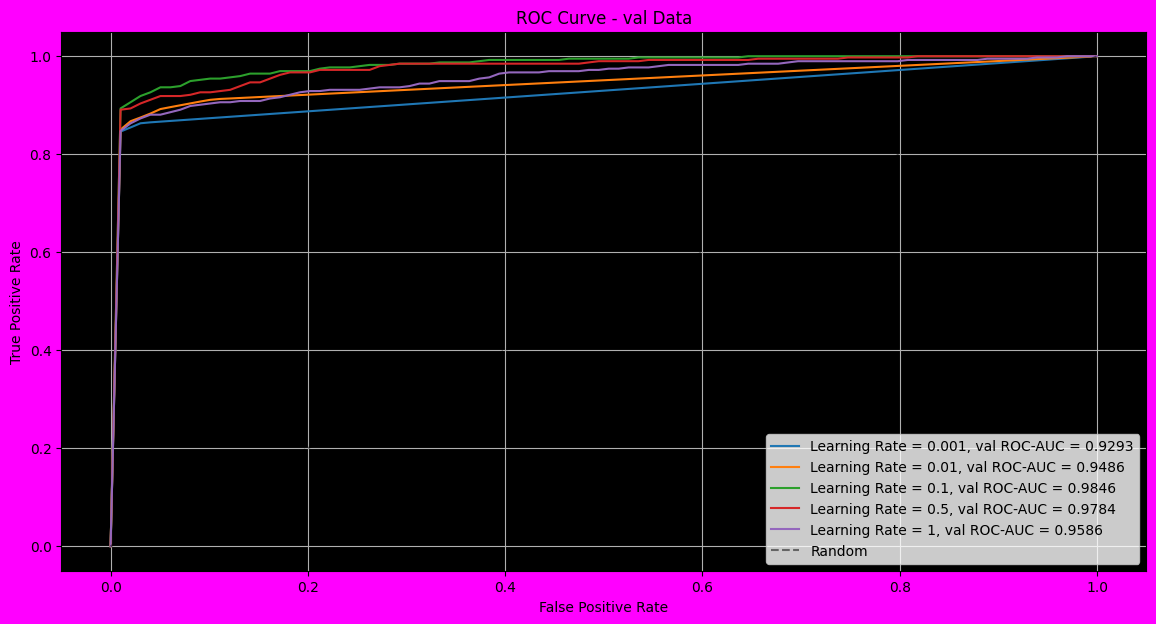





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of Learning Rate: 
 [0.9293000893254546, 0.9486445966643814, 0.984612093683384, 0.9783772926582546, 0.9586362708999457]
Best Learning Rate : 0.1
Best Mean ROC-AUC score for val data: 0.984612093683384
Mean precision val score for best C 0.9168346318146203
Mean recall val score for best C 0.7766790037782404
Mean f1 val score for best C 0.8402065614716365




In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import xgboost as xgb

print("============================================================================================================")

print("============================================XGBoost Classifier:=============================================")


# Define your values of C
learning_rate_values = [0.001, 0.01, 0.1, 0.5, 1]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax2.set_facecolor('black')

# Loop through each value of C
for learning_rate in learning_rate_values:
    print("Learning Rate =", learning_rate)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        xgb_classifier = xgb.XGBClassifier(learning_rate = learning_rate, n_estimators=100, max_depth=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', reg_alpha=0.005, reg_lambda=1, random_state=42)
        xgb_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = xgb_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")
        
    # Calculate mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='Learning Rate = ' + str(learning_rate) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("=====================================XGBoost Has Run Successfully:==========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Set labels and title for ROC curves
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()




print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for val data for all values of learning_rate_values
print("Mean ROC-AUC scores for val data for all values of Learning Rate: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_learning_rate = learning_rate_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Learning Rate :", best_learning_rate)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])


print("============================================================================================================")
print("\n")
print("============================================================================================================")


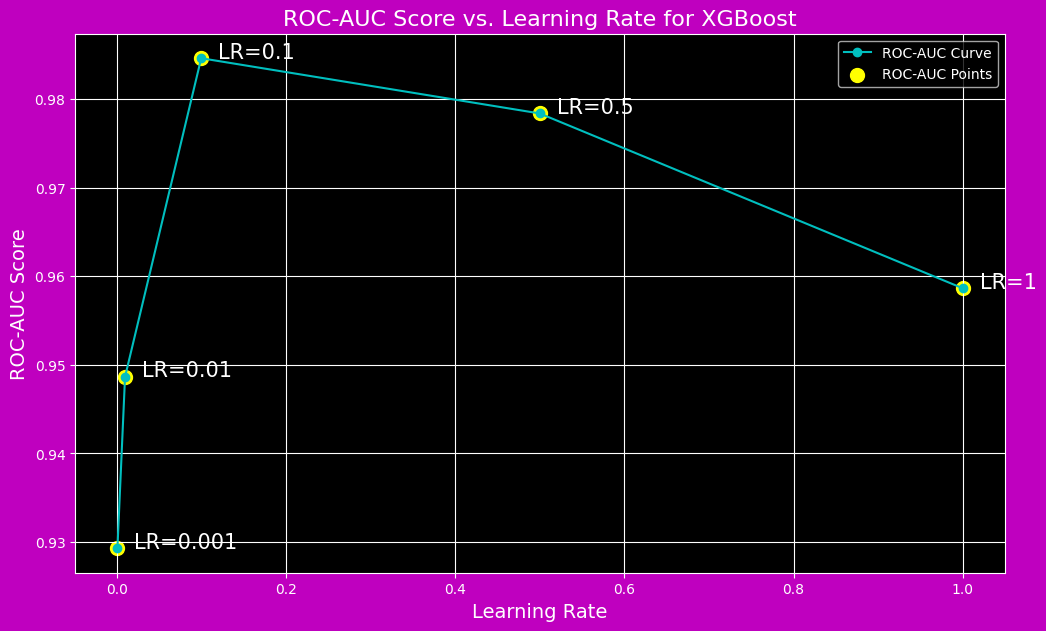

In [32]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(12, 7), facecolor='m')

    # Plot ROC-AUC scores vs learning_rate
    plt.plot(learning_rate_values, mean_roc_auc_scores_val, 'co-', label='ROC-AUC Curve')  # Line plot
    plt.scatter(learning_rate_values, mean_roc_auc_scores_val, color='yellow', s=100, label='ROC-AUC Points')  # Add points

    # Add labels for each point (show both learning_rate and ROC-AUC)
    for i, (lr, auc) in enumerate(zip(learning_rate_values, mean_roc_auc_scores_val)):
        plt.text(lr + 0.02, auc, f"LR={lr}", fontsize=15, ha='left', color='white')  # Shift text to the right

    plt.xlabel('Learning Rate', fontsize=14)
    plt.ylabel('ROC-AUC Score', fontsize=14)
    plt.title('ROC-AUC Score vs. Learning Rate for XGBoost', fontsize=16)
    plt.legend(loc='upper right')
    plt.grid()

    plt.show()

In [33]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

params = {
    'learning_rate': [0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.9],
}

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc') # As the number of classes are 2

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(xgb_classifier, 
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, 
                        verbose=1, 
                        return_train_score=True)

# Fit the GridSearchCV object and perform hyperparameter tuning
model_GridSearch.fit(X_train_pt, y_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Time taken: 39.55 seconds
Best ROC AUC score:  0.9837249007934156
Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5}


In [34]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} 0.9837249007934156
{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.7} 0.9833786203801483
{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.9} 0.9827942418709767
{'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.5} 0.9810847166647876
{'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.7} 0.9807792945330731
{'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.9} 0.9796346270158716
{'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.5} 0.9814724869252762
{'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.7} 0.9791171774325869
{'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.9} 0.9778991506644884

Rank of each hyperparameter combination:
1 {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5}
2 {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.7}
3 {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.9}
4 {'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.5}
5 {'learning_rate': 

In [35]:
best_model = model_GridSearch.best_estimator_

In [36]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
y_test_pred_proba = best_model.predict_proba(X_test_pt)[:, 1]
y_test_pred = (y_test_pred_proba >= 0.5).astype(int)
test_roc_auc = roc_auc_score(y_test_pt, y_test_pred_proba)
test_f1_score = f1_score(y_test_pt, y_test_pred)
test_precision = precision_score(y_test_pt, y_test_pred)
test_recall = recall_score(y_test_pt, y_test_pred)
print("Test ROC-AUC Score:", test_roc_auc)
print("Test F1 Score:", test_f1_score)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)


Test ROC-AUC Score: 0.9737071372583923
Test F1 Score: 0.8404255319148936
Test Precision: 0.8777777777777778
Test Recall: 0.8061224489795918


In [37]:
index_to_predict = 840 
single_data_point = X_test_pt[index_to_predict].reshape(1, -1)
single_pred_proba = best_model.predict_proba(single_data_point)[:, 1]
single_pred = (single_pred_proba >= 0.5).astype(int)[0]
true_label = 1
print(f"  Kết quả của mô hình XGBoost:")
print(f"  Thuộc tính của dữ liệu thử nghiệm: {X_test_pt[index_to_predict][:5]}")
print(f"  Xác suất dự đoán: {single_pred_proba[0]:.4f}")
print(f"  Dự đoán: {single_pred}")
print(f"  Nhãn thực tế: {true_label}")

  Kết quả của mô hình XGBoost:
  Thuộc tính của dữ liệu thử nghiệm: [-0.87009612  1.80395146 -1.68519874  1.54698182 -0.99316979]
  Xác suất dự đoán: 0.9701
  Dự đoán: 1
  Nhãn thực tế: 1


In [38]:
smote = over_sampling.SMOTE(random_state=0)
X_smote_train_pt, y_smote_train_pt = smote.fit_resample(X_train_pt, y_train_pt)


In [39]:
print(y_smote_train_pt.value_counts())
print("======================================")
print(y_train.value_counts())

Class
0    227451
1    227451
Name: count, dtype: int64
Class
0    227451
1       394
Name: count, dtype: int64


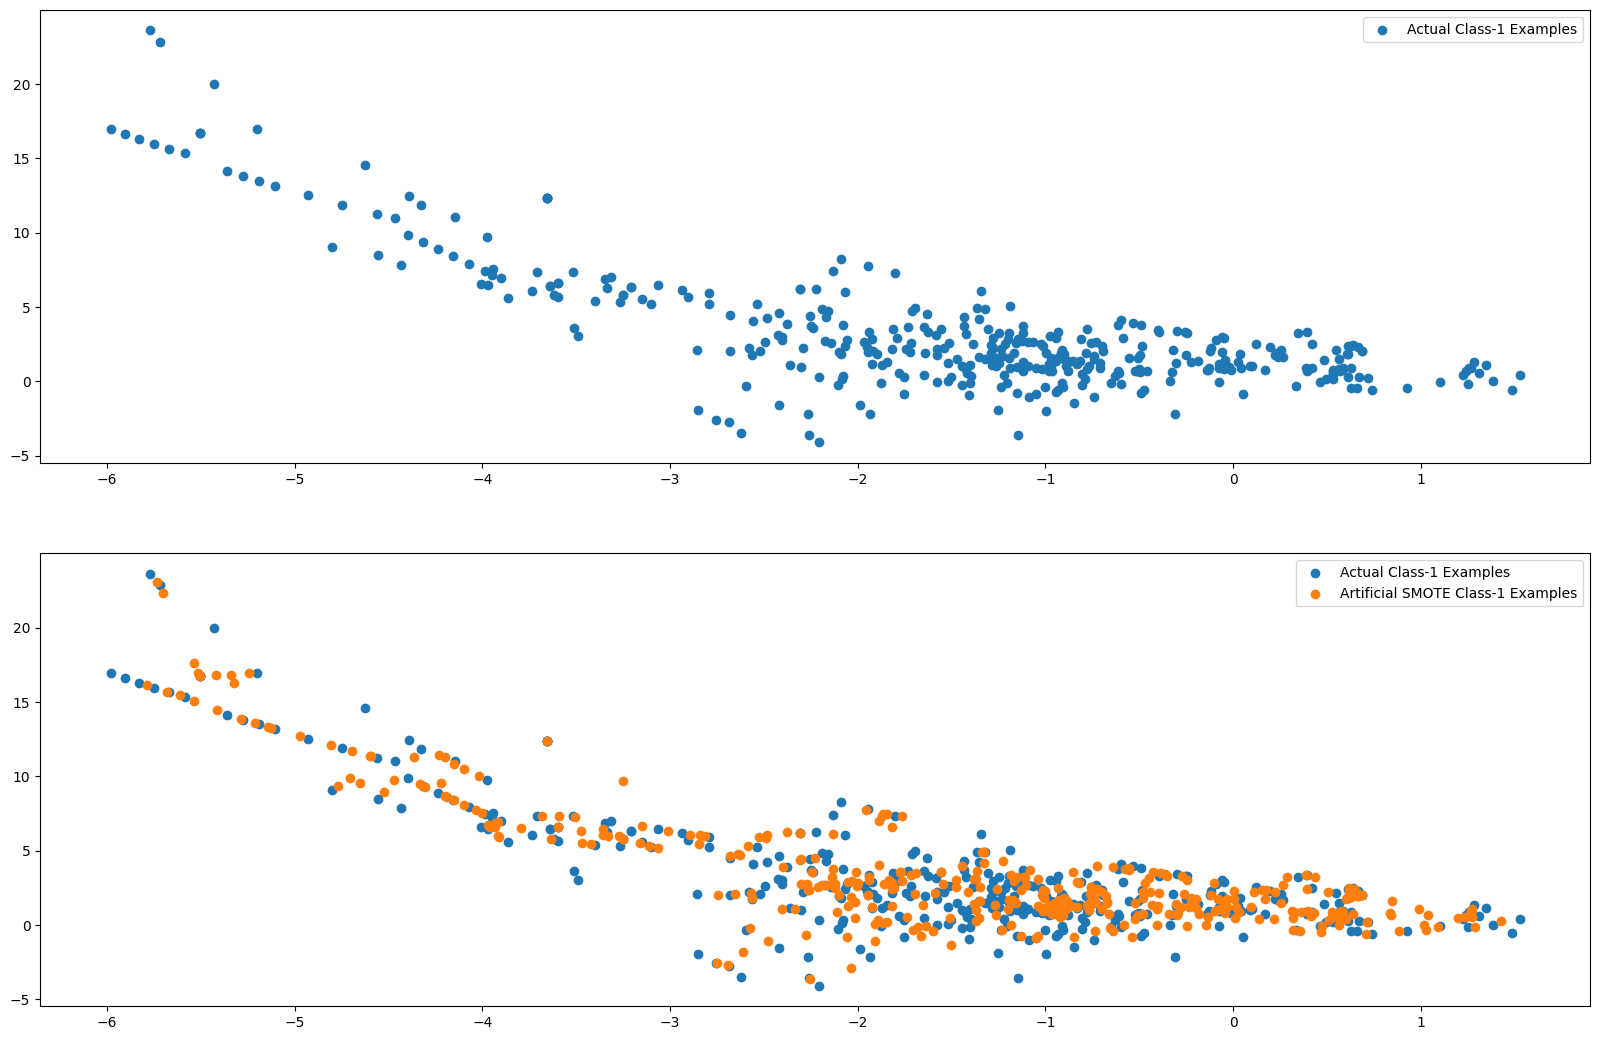

In [40]:
X_smote_train_pt_1 = X_smote_train_pt[X_train_pt.shape[0]:]
X_train_pt_1 = np.array(X_train_pt)[np.where(y_train_pt==1.0)]
X_train_pt_0 = np.array(X_train_pt)[np.where(y_train_pt==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_smote_train_pt_1[:X_train_pt_1.shape[0], 0], X_smote_train_pt_1[:X_train_pt_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

In [41]:
print(y_smote_train_pt.value_counts())

Class
0    227451
1    227451
Name: count, dtype: int64


(array([2.00000e+00, 1.20000e+01, 6.48400e+03, 8.61800e+03, 1.85730e+04,
        2.23130e+04, 6.63820e+04, 1.69144e+05, 1.04130e+05, 5.92440e+04]),
 array([-8.47181275, -7.43814201, -6.40447126, -5.37080052, -4.33712977,
        -3.30345903, -2.26978828, -1.23611754, -0.20244679,  0.83122396,
         1.8648947 ]),
 <BarContainer object of 10 artists>)

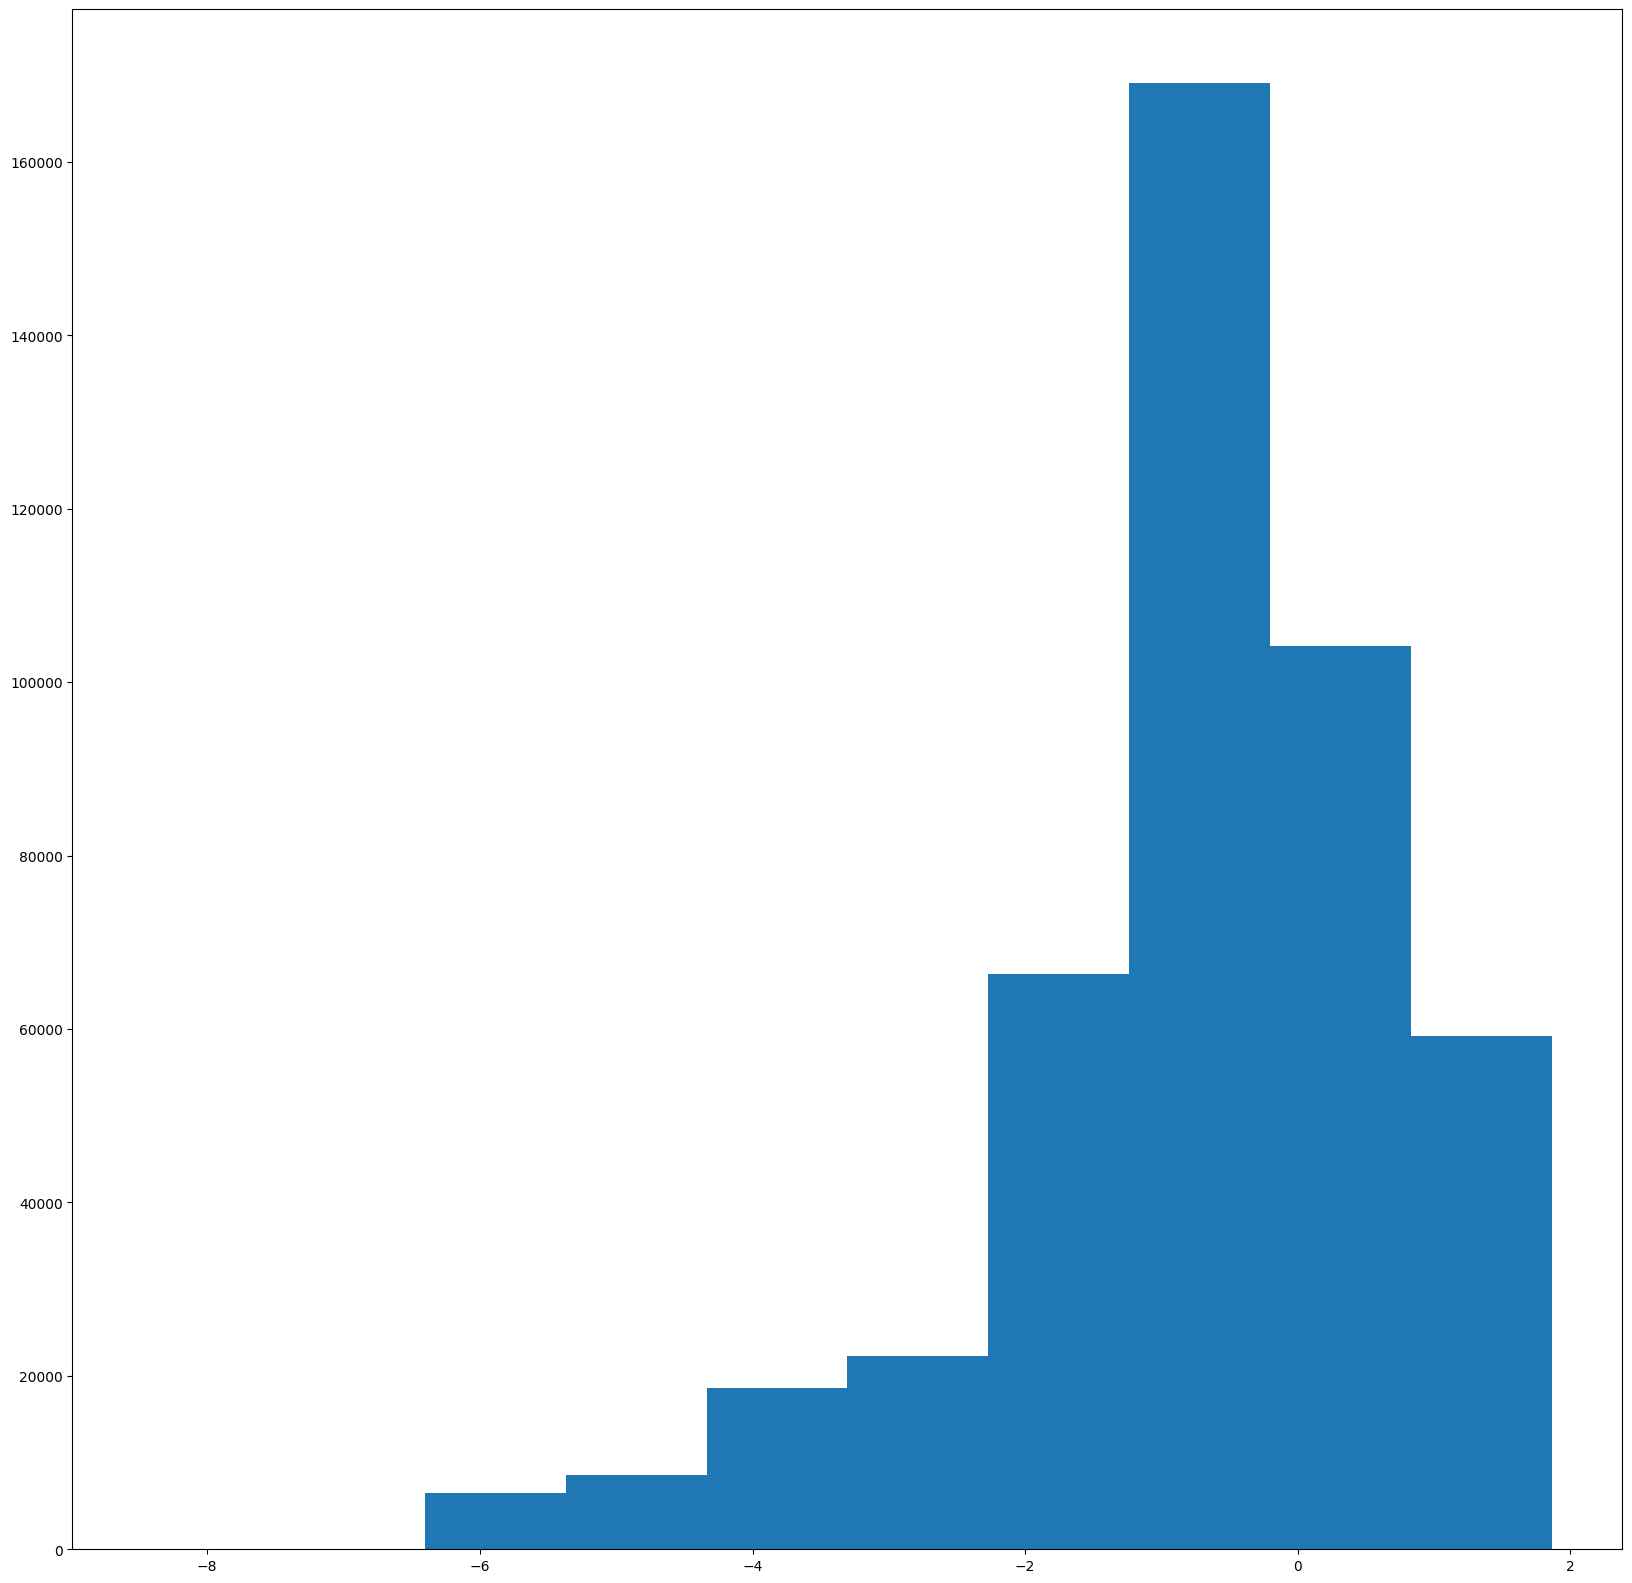

In [42]:
plt.hist(X_smote_train_pt[:,0])

================================XGBoost Classifier using SMOTE:=============================================
Learning Rate = 0.001
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 3.0241966247558594 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084]
Time elapsed: 2.808913230895996 seconds
Train: [     0      1      2 ... 379082 379083 379084] val: [151894 151895 151896 ... 454899 454900 454901]
Time elapsed: 2.7299394607543945 seconds
ROC-AUC Score for val data = 0.984141522131378
Mean precision val score: 0.9819327366388713
Mean recall val score: 0.8923548368659624
Mean f1 val score: 0.9350022066963856
------------------------------------------------------------------------------------------------------------
Learning Rate = 0.01
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed:

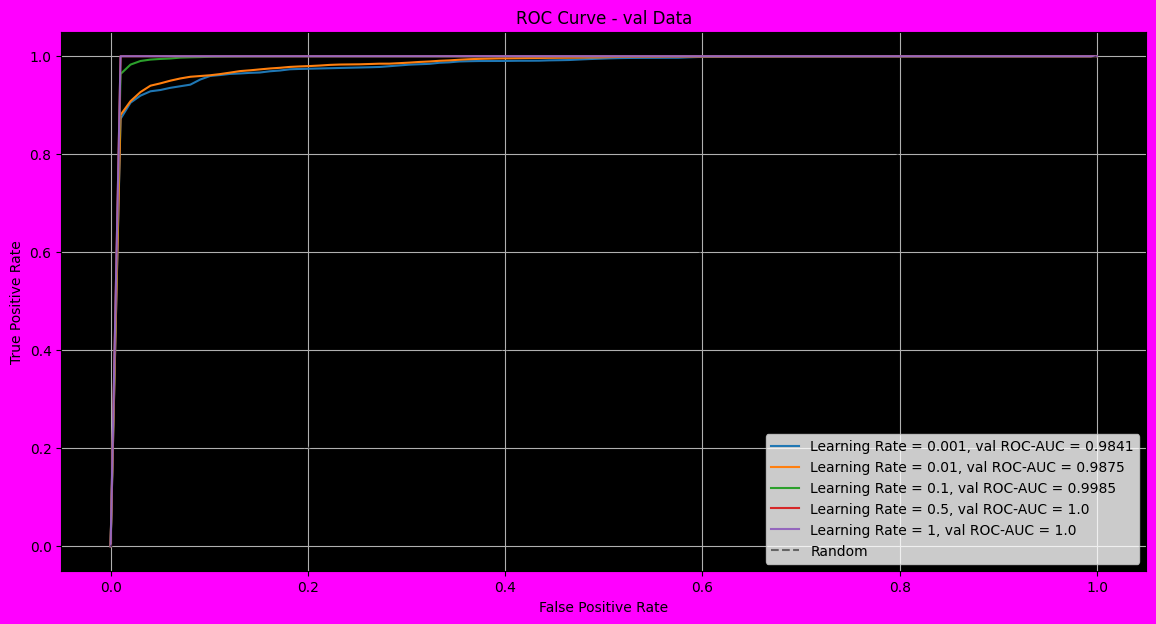





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of Learning Rate: 
 [0.984141522131378, 0.9874860183518942, 0.9985370592971776, 0.9999541178634064, 0.999972897627198]
Best Learning Rate : 1
Best Mean ROC-AUC score for val data: 0.999972897627198
Mean precision val score for best Learning Rate: 0.9987047518982749
Mean recall val score for best Learning Rate: 1.0
Mean f1 val score for best Learning Rate: 0.9993519426125479




In [76]:
print("============================================================================================================")

print("================================XGBoost Classifier using SMOTE:=============================================")


# Define your values of C
learning_rate_values = [0.001, 0.01, 0.1, 0.5, 1]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax2.set_facecolor('black')

# Loop through each value of C
for learning_rate in learning_rate_values:
    print("Learning Rate =", learning_rate)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_smote_train_pt, y_smote_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_smote_train_pt[train_index], X_smote_train_pt[val_index]
        y_train_cv, y_val_cv = y_smote_train_pt.iloc[train_index], y_smote_train_pt.iloc[val_index]


        xgb_classifier = xgb.XGBClassifier(learning_rate = learning_rate, n_estimators=100, max_depth=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', reg_alpha=0.005, reg_lambda=1, random_state=42)
        xgb_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = xgb_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")
        
    # Calculate mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='Learning Rate = ' + str(learning_rate) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("=====================================XGBoost Has Run Successfully:==========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Set labels and title for ROC curves
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")


print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for val data for all values of learning_rate_values
print("Mean ROC-AUC scores for val data for all values of Learning Rate: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_learning_rate = learning_rate_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Learning Rate :", best_learning_rate)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best Learning Rate:", mean_precision_scores_val[best_index])
print("Mean recall val score for best Learning Rate:", mean_recall_scores_val[best_index])
print("Mean f1 val score for best Learning Rate:", mean_f1_scores_val[best_index])


print("============================================================================================================")
print("\n")
print("============================================================================================================")

In [77]:
params = {
    'learning_rate': [0.8, 1, 1.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.9],
}

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc') # As the number of classes are 2

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(xgb_classifier, 
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, 
                        verbose=1, 
                        return_train_score=True)

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_smote_train_pt, y_smote_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Time taken: 224.51 seconds
Best ROC AUC score:  0.9999900656739632
Best hyperparameters:  {'learning_rate': 0.8, 'max_depth': 7, 'subsample': 0.9}


In [78]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'learning_rate': 0.8, 'max_depth': 3, 'subsample': 0.5} 0.9999677782430778
{'learning_rate': 0.8, 'max_depth': 3, 'subsample': 0.7} 0.9999709321193361
{'learning_rate': 0.8, 'max_depth': 3, 'subsample': 0.9} 0.9999696745120842
{'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.5} 0.9999872851888191
{'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.7} 0.9999866170976515
{'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9} 0.9999893289238301
{'learning_rate': 0.8, 'max_depth': 7, 'subsample': 0.5} 0.9999862667571612
{'learning_rate': 0.8, 'max_depth': 7, 'subsample': 0.7} 0.9999867969795021
{'learning_rate': 0.8, 'max_depth': 7, 'subsample': 0.9} 0.9999900656739632
{'learning_rate': 1, 'max_depth': 3, 'subsample': 0.5} 0.999969744823736
{'learning_rate': 1, 'max_depth': 3, 'subsample': 0.7} 0.9999734587576713
{'learning_rate': 1, 'max_depth': 3, 'subsample': 0.9} 0.9999679986302388
{'learning_rate': 1, 'max_depth': 5, 'subsample': 0.5} 0.9999853958205024
{'l

In [79]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
y_test_pred_proba = best_model.predict_proba(X_test_pt)[:, 1]
y_test_pred = (y_test_pred_proba >= 0.5).astype(int)
test_roc_auc = roc_auc_score(y_test_pt, y_test_pred_proba)
test_f1_score = f1_score(y_test_pt, y_test_pred)
test_precision = precision_score(y_test_pt, y_test_pred)
test_recall = recall_score(y_test_pt, y_test_pred)
print("Test ROC-AUC Score:", test_roc_auc)
print("Test F1 Score:", test_f1_score)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

Test ROC-AUC Score: 0.980599252925706
Test F1 Score: 0.7714285714285715
Test Precision: 0.7232142857142857
Test Recall: 0.826530612244898


In [82]:
index_to_predict = 840 
single_data_point = X_test_pt[index_to_predict].reshape(1, -1)
single_pred_proba = best_model.predict_proba(single_data_point)[:, 1]
single_pred = (single_pred_proba >= 0.5).astype(int)[0]
true_label = 1
print(f"  Kết quả của mô hình XGBoost:")
print(f"  Thuộc tính của dữ liệu thử nghiệm: {X_test_pt[index_to_predict][:5]}")
print(f"  Xác suất dự đoán: {single_pred_proba[0]:.4f}")
print(f"  Dự đoán: {single_pred}")
print(f"  Nhãn thực tế: {true_label}")

  Kết quả của mô hình XGBoost:
  Thuộc tính của dữ liệu thử nghiệm: [-0.87009612  1.80395146 -1.68519874  1.54698182 -0.99316979]
  Xác suất dự đoán: 1.0000
  Dự đoán: 1
  Nhãn thực tế: 1
